# Setup


In [2]:
import finlab_crypto
# Set up the initial development environment
finlab_crypto.setup()

# Download History Data

### how to use "get_all_binance" func?
You could adjust the following parameters to download data.
1.   symbol (str): trading pair (ex: BTCUSDT)
2.   kline_size (str): frequency of the price data (ex: "1m", "5m",'15m', '30m', "1h", '2h', "4h", "1d")






In [3]:
ohlcv = finlab_crypto.crawler.get_all_binance('BTCUSDT', '4h')

All caught up..!


In [4]:
#head default value is 5, if you want to show top 10 columns,use head(10).if you want to show last 5 columns, use "tail".
ohlcv.tail()

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,
2024-06-27 00:00:00+00:00,60864.98,61300.00,60764.73,61037.31,2391.00432,1.719461e+12,1.458631e+08,145592.0,1250.28996,7.627370e+07,0.0
2024-06-27 04:00:00+00:00,61037.31,61192.00,60606.63,60794.01,2714.73648,1.719475e+12,1.652248e+08,147883.0,1492.19516,9.080640e+07,0.0
2024-06-27 08:00:00+00:00,60794.01,61455.15,60736.62,61196.02,2628.05752,1.719490e+12,1.606083e+08,153306.0,1381.45030,8.442241e+07,0.0
2024-06-27 12:00:00+00:00,61196.01,62389.22,61154.60,61576.00,6247.05892,1.719504e+12,3.859335e+08,358878.0,3046.99538,1.882169e+08,0.0
2024-06-27 16:00:00+00:00,61576.00,61700.00,61571.87,61676.84,110.07581,1.719518e+12,6.785726e+06,5879.0,64.86050,3.998396e+06,0.0


# Create Entry signal and exit signal

1.   [rooling api reference](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html)
2.   [mean api reference](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html)
3.   [shift api reference](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html):

  Number of periods to shift can be positive or negative.
4.[plot api reference](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)

5. [astype api reference](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)


<Axes: >

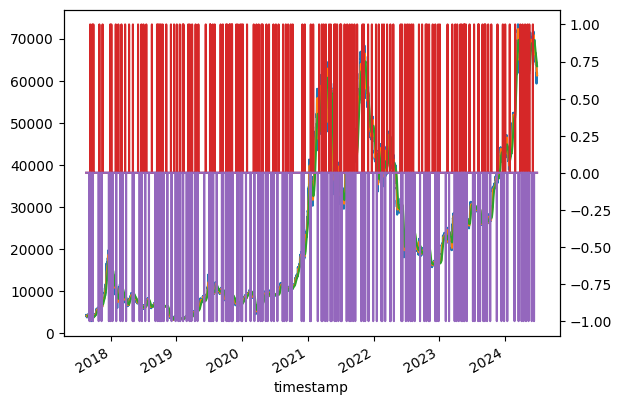

In [5]:
# get close series from ohlcv dataframe
close = ohlcv.close

# calculate Simple Moving Average(SMA)
sma20 = close.rolling(20).mean()
sma60 = close.rolling(60).mean()

# calculate entries & exits conditions to get sigal, use "shift" calculate previous conditions to get cross signal.
entries = (sma20 > sma60) & (sma20.shift() < sma60.shift())
exits = (sma20 < sma60) & (sma20.shift() > sma60.shift())

# show plot
close.plot()
sma20.plot()
sma60.plot()
entries.astype(int).plot(secondary_y=True)
(-exits.astype(int)).plot(secondary_y=True)

# Backtest

1.  [vectorbt api reference](https://polakowo.io/vectorbt/docs/index.html)
2.   [Profolio object](https://polakowo.io/vectorbt/docs/portfolio/base.html#content)
3.   [portfolio.positions.records columns meanings](vectorbt.records.events)

In [6]:
import vectorbt as vbt

portfolio = vbt.Portfolio.from_signals(close, entries, exits, freq='4h')

<Axes: xlabel='timestamp'>

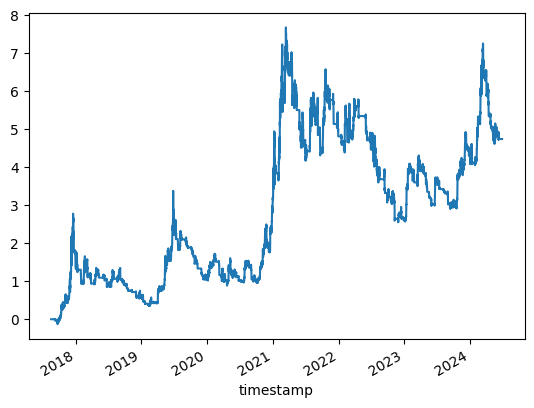

In [7]:
# Diff:cumulative_returns is func in vectorbt==0.14.4, not method, so the code is different from vedio.
portfolio.cumulative_returns().plot()

In [8]:
# get trading detail
# Diff:positions is func in vectorbt==0.14.4, not method, so the code is different from vedio.
portfolio.positions.records

,id,col,size,entry_idx,entry_price,entry_fees,exit_idx,exit_price,exit_fees,pnl,return,direction,status,parent_id
0,0,0,0.022950,134,4352.99865,0.099900,141,4249.44630,0.097524,-2.573921,-0.025765,0,1,0
1,1,0,0.024755,205,3931.69777,0.097329,226,3776.22000,0.093480,-4.039644,-0.041505,0,1,1
2,2,0,0.023598,241,3953.39945,0.093293,418,5684.30001,0.134139,40.618719,0.435388,0,1,2
3,3,0,0.021978,441,6091.08500,0.133871,514,6500.47302,0.142869,8.720885,0.065144,0,1,3
4,4,0,0.019179,548,7434.42700,0.142583,759,14686.23906,0.281665,138.656870,0.972461,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,141,0,0.009950,14539,69528.40895,0.691833,14574,63860.58549,0.635436,-57.724188,-0.083437,0,1,141
142,142,0,0.009602,14624,66045.98000,0.634167,14655,62799.27786,0.602992,-32.411654,-0.051109,0,1,142
143,143,0,0.009411,14705,63943.81994,0.601787,14739,60623.32599,0.570538,-32.422119,-0.053876,0,1,143
144,144,0,0.008618,14765,66072.23623,0.569398,14846,67878.95310,0.584968,14.415567,0.025317,0,1,144


# Strategy Function

In [9]:
# output format is tuple
def sma_strategy(ohlcv):
  close = ohlcv.close
  sma20 = close.rolling(20).mean()
  sma60 = close.rolling(60).mean()

  entries = (sma20 > sma60) & (sma20.shift() < sma60.shift())
  exits = (sma20 < sma60) & (sma20.shift() > sma60.shift())
  return entries, exits



In [10]:
sma_strategy(ohlcv)

(timestamp
 2017-08-17 04:00:00+00:00    False
 2017-08-17 08:00:00+00:00    False
 2017-08-17 12:00:00+00:00    False
 2017-08-17 16:00:00+00:00    False
 2017-08-17 20:00:00+00:00    False
                              ...  
 2024-06-27 00:00:00+00:00    False
 2024-06-27 04:00:00+00:00    False
 2024-06-27 08:00:00+00:00    False
 2024-06-27 12:00:00+00:00    False
 2024-06-27 16:00:00+00:00    False
 Name: close, Length: 15024, dtype: bool,
 timestamp
 2017-08-17 04:00:00+00:00    False
 2017-08-17 08:00:00+00:00    False
 2017-08-17 12:00:00+00:00    False
 2017-08-17 16:00:00+00:00    False
 2017-08-17 20:00:00+00:00    False
                              ...  
 2024-06-27 00:00:00+00:00    False
 2024-06-27 04:00:00+00:00    False
 2024-06-27 08:00:00+00:00    False
 2024-06-27 12:00:00+00:00    False
 2024-06-27 16:00:00+00:00    False
 Name: close, Length: 15024, dtype: bool)

## [What is decorator?](https://book.pythontips.com/en/latest/decorators.html)

Decorator is widely used in various libraries/packages and has several main advantages:
1. High flexibility
2. High legibility
3. Good encapsulation effect
4. Low code repetition rate/high simplicity

**You can think of it as a decorator to let the function get plug-in functions**

In the following example, we add @Strategy on sma_strategy to let sma_strategy function get finlab_crypto.Strategy method like backtest,plot....

In [11]:
from finlab_crypto import Strategy
import numpy as np

from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB

# adjust sma1, sma2 in decorator or use variables parameter in backtest func like variables = {'sma1': 20, 'sma2': 60}
@Strategy(sma1=20, sma2=60)
def sma_strategy(ohlcv):
  close = ohlcv.close
  sma20 = close.rolling(sma_strategy.sma1).mean()
  sma60 = close.rolling(sma_strategy.sma2).mean()

  entries = (sma20 > sma60) & (sma20.shift() < sma60.shift())
  exits = (sma20 < sma60) & (sma20.shift() > sma60.shift())

  figures = {
      'overlaps': {
          'sma20': sma20,
          'sma60': sma60,
      }
  }
  return entries, exits, figures

# choose plot=True, you could get beatiful interactive canvas plot(by pyechart)
portfolio = sma_strategy.backtest(ohlcv, freq='4h', plot=True)

# Strategy Optimization Dashboard

In [ ]:
# add variables and use numpy to calculate parameters optimization
# Diff:The info about Probability is overfitting... is move to title at bottom left chart, not print below the green prosess bar graph.
# Diff:final_value() is replace to final_equity() in vectorbt==0.14.4,so the code is different from vedio.

variables = {'sma1': np.arange(20, 310, 10), 'sma2': np.arange(20, 310, 10)}
portfolio = sma_strategy.backtest(ohlcv, variables=variables, freq='4h', plot=True)

  0%|          | 0/841 [00:00<?, ?it/s]